**Importing all the Required Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from google.colab import files

data=files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


**Read the csv data into Data Frame**

In [28]:
import io
df=pd.read_csv(io.StringIO(data['hotel_bookings.csv'].decode('utf-8')))

**Display the Data frame **

In [29]:
df.head(25)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


**Find out the Number of rows and columns**

In [30]:
df.shape

(119390, 32)

**Reducing Dimensions by combining the related value into One Column- *Feature Creation** 



In [32]:
df['reached_date']=pd.to_datetime(df.arrival_date_year.astype(str)+'/'+df.arrival_date_month.astype(str)+'/'+df.arrival_date_day_of_month.astype(str))

In [33]:
df['reached_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: reached_date, Length: 119390, dtype: datetime64[ns]

**Data Cleaning: Handle NA values**

In [34]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Finding the Number of Rows that has Country as Null**

In [35]:
df.country.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: country, Length: 119390, dtype: bool

In [36]:
df.country.isnull().sum()

488

In [37]:
df.children[df.children!=df.children].index.values

array([40600, 40667, 40679, 41160])

**Remove the not needed columns**

In [38]:
for col in df.columns:
  if np.sum(df[col].isnull())>(df.shape[0] * 0.7):
     df.drop (columns=col, inplace=True, axis=1)

In [39]:
df.shape

(119390, 33)

**Drop the Unwanted Columns**

In [40]:
df.drop(columns=["arrival_date_year","arrival_date_month","arrival_date_day_of_month","arrival_date_week_number"], inplace=True, axis=1)

In [41]:
df.shape

(119390, 29)

In [42]:
df.dropna(subset=['agent'], inplace =True)

In [43]:
df.shape

(103050, 29)

In [44]:
df["children"].fillna(value=df["children"].mean(), inplace =True)
df["children"]=df["children"].apply(np.floor)

In [57]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reached_date
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-07-01
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-07-01
7,Resort Hotel,0,9,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-07-01
8,Resort Hotel,1,85,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,2015-07-01


In [65]:
data_feature=df.iloc[:2,:8]
data_feature.head(100)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies
3,Resort Hotel,0,13,0,1,1,0.0,0
4,Resort Hotel,0,14,0,2,2,0.0,0


**Select the needed Columns and remove the data points which has null values, as it cant be handled by clustering**



In [79]:
m_list = ['lead_time','stays_in_weekend_nights','hotel']
measure_dataframe = df[m_list]
measure_dataframe = measure_dataframe[measure_dataframe[m_list] != 0]
measure_dataframe = measure_dataframe.dropna(how='any')

display(measure_dataframe.head())

,lead_time,stays_in_weekend_nights,hotel
20,37.0,1.0,Resort Hotel
21,72.0,2.0,Resort Hotel
22,72.0,2.0,Resort Hotel
23,72.0,2.0,Resort Hotel
24,127.0,2.0,Resort Hotel


**Here we need to set the index and change the data type**

In [80]:
measure_dataframe = measure_dataframe.set_index('hotel')
measure_dataframe = measure_dataframe.astype('float')
measure_dataframe.head()

,lead_time,stays_in_weekend_nights
hotel,,
Resort Hotel,37.0,1.0
Resort Hotel,72.0,2.0
Resort Hotel,72.0,2.0
Resort Hotel,72.0,2.0
Resort Hotel,127.0,2.0


**Filter declaration and counting**

In [86]:
lead_time_df = measure_dataframe.iloc[:,0]<200
stays_df = measure_dataframe.iloc[:,1] <10


lead_time_df_count = pd.Series(div_yield).value_counts()
stays_df_count = pd.Series(roi).value_counts()


display(lead_time_df_count)
display(stays_df_count)


True    59605
Name: lead_time, dtype: int64

True     59588
False       17
Name: stays_in_weekend_nights, dtype: int64

**Plotting on 3D**

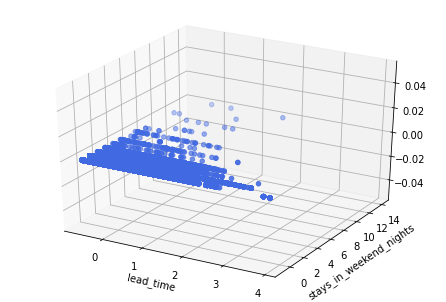

In [87]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

robust_scaler = RobustScaler()

# scale the data
train_r = robust_scaler.fit_transform(measure_dataframe)

# create a new plot
fig = plt.figure()
ax = Axes3D(fig)

# take the scaled data in this example.
x = train_r[:,0]
y = train_r[:,1]


# define the axes labels
column_names = measure_dataframe.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])


# create a new plot
ax.scatter(x, y, c='royalBlue',marker='o')

plt.show()

**K-Means Clustering**

In [91]:
from sklearn.cluster import KMeans
from sklearn import metrics

results_collection = {}
num_of_clusters = 15

for k in range(1, num_of_clusters):
    # print("~"*20)
    results_collection[k] = {}
    kmeans = KMeans(n_clusters=k, random_state=0).fit(train_r)
    results_collection[k]['inertia'] = kmeans.inertia_

**Plotting the Different clusters in 3D**

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


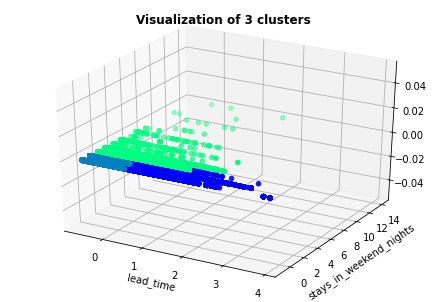

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


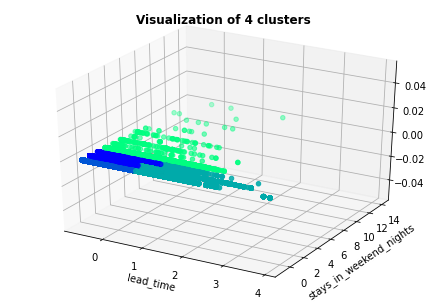

In [90]:
clusters = [3,4]

for cluster in clusters:
    
    print('~'*80)
    
    kmeans_cluster = KMeans(n_clusters= cluster, random_state=0).fit(train_r)
    cluster_centers = kmeans_cluster.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
  
    fig = plt.figure()
    ax = Axes3D(fig)

    x = train_r[:,0]
    y = train_r[:,1]
    column_names = measure_dataframe.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
   
    ax.scatter(x, y, c = kmeans_cluster.labels_.astype(float), cmap='winter')
    ax.scatter(C1, C2, marker="x", color='red')
    plt.title('Visualization of {} clusters'.format(cluster), fontweight='bold')
    #ax.scatter(x, y, c='royalBlue',marker='x')
    plt.show()